In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [38]:
ts1=pd.read_csv(r"C:\\Users\\RAHUL\\Desktop\\kaggledata\\task1@.csv")

In [39]:
#ts1['attend_date'] = pd.to_datetime(ts1['attend_date'], format='%d-%m-%Y')

In [40]:
ts2=pd.DataFrame(ts1)

In [41]:
ts2

,Unnamed: 0,plant_code,plan_cd,attend_date,dept,division,direct_indirect,employee_class,jobtitle,workforce_category_descr,attend_type_code,attend_reason_code,plant_line_running,absentee,total_attend_hours
0,0,AEP,AEP 124MC30,09-12-2022,AEP_ALMC.4O01,AEP_MFG.4O01,DIR,E,PA,Operator,ABS,SL,Y,1,8.0
1,1,AEP,AEP 114MC30,10-11-2023,AEP_ALMC.4O01,AEP_MFG.4O01,DIR,E,LSS,Team Leader,ABS,NaN,Y,1,8.0
2,2,AEP,AEP 924FM30,19-06-2023,AEP_DMD.4O01,AEP_MFG.4O01,DIR,E,PA,Operator,PTO,EPT,NaN,1,8.0
3,3,AEP,AEP 014MC30,25-03-2022,AEP_ALDC.4O01,AEP_MFG.4O01,DIR,E,PS,Operators - PS,PTO,NaN,Y,1,8.0
4,4,MAP,MAP 024,13-02-2023,MAP_PA.4O01,MAP_MFG_DV.4O01,DIR,E,PS,Operator,PTO,NaN,Y,1,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396876,22361,AAP,HMA 014AF,04-03-2022,AL_L1_WE.4O01,AL_L1.4O01,DIR,E,PA,Most Processes,ABS,ABS,Y,2,16.0
396877,22362,AAP,HMA 024AF,12-07-2022,AL_VQ.4O01,AL_QUAL.4O01,DIR,E,PA,Vacation Coverage,ABS,FL,Y,1,8.0
396878,22363,ELP,ELP 034,16-09-2022,ELP_VQ.4O01,ELP_QUAL.4O01,DIR,C,PA,Most Processes,ABS,ABS,Y,3,24.0
396879,22364,AEP,AEP 044AE,21-12-2021,AEP_AE.4O01,AEP_MFG.4O01,DIR,E,PA,Most Processes,ABS,FL,Y,5,40.0


In [42]:
ts2.rename(columns={"plant_code":"classes",
                        "absentee":"cost",
                        "total_attend_hours":"hours",
                        "jobtitle":"job",
                        "attend_type_code":"code"},inplace=True)

ts2.drop(columns=["plan_cd","dept","division","direct_indirect","employee_class","workforce_category_descr","attend_reason_code","plant_line_running"],inplace=True)


In [43]:
ts2

,Unnamed: 0,classes,attend_date,job,code,cost,hours
0,0,AEP,09-12-2022,PA,ABS,1,8.0
1,1,AEP,10-11-2023,LSS,ABS,1,8.0
2,2,AEP,19-06-2023,PA,PTO,1,8.0
3,3,AEP,25-03-2022,PS,PTO,1,8.0
4,4,MAP,13-02-2023,PS,PTO,1,8.0
...,...,...,...,...,...,...,...
396876,22361,AAP,04-03-2022,PA,ABS,2,16.0
396877,22362,AAP,12-07-2022,PA,ABS,1,8.0
396878,22363,ELP,16-09-2022,PA,ABS,3,24.0
396879,22364,AEP,21-12-2021,PA,ABS,5,40.0


In [62]:
ts2['attend_date'] = pd.to_datetime(ts2['attend_date'],format='%d-%m-%Y')
start_date = ('10-01-2023')
end_date = ('11-30-2023')
ts2 = ts2[(ts2['attend_date'] >= start_date) & (ts2['attend_date']  <= end_date)]



#ts2=ts1[(ts1["attend_date"] >='2023-10-01') & (ts1["attend_date"] <='2023-11-30')]

In [63]:
ts2

,Unnamed: 0,classes,attend_date,job,code,cost,hours
1,1,AEP,2023-11-10,LSS,ABS,1,8.0
18,19,AAP,2023-10-05,PA,PTO,1,4.0
42,45,AEP,2023-10-25,PA,ABS,1,8.0
54,57,AAP,2023-10-31,PA,ABS,5,40.0
59,62,MAP,2023-10-23,PA,ABS,9,72.0
...,...,...,...,...,...,...,...
396799,22274,AEP,2023-10-06,PMA,PTO,1,8.0
396804,22279,MAP,2023-10-24,LSS,ABS,1,8.0
396848,22330,AEP,2023-10-12,PA,PTO,2,16.0
396853,22336,TPO,2023-10-13,PAN,ABS,1,8.0


In [64]:
ts4=ts2.groupby(['attend_date']).agg('sum').reset_index()

In [65]:
ts4

,attend_date,Unnamed: 0,classes,job,code,cost,hours
0,2023-10-01,193778,AEPAEPAEPAEPAEPAEPAEPAEPAEPAEPAEPAEPELPAAPAEPAEP,PAPSPAPAPALSSLSSPAPAPAPAPAPAPAPAPA,PTOPTOABSPTOPTOPTOABSABSPTOPTOABSABSABSABSABSPTO,16,125.50
1,2023-10-02,9059463,MAPIAPAEPAEPAEPMAPAAPAEPELPAEPAEPELPAEPELPAEPM...,PALSSPSPAPAPSPSPAPALSSLSSPAPSLSSLSSLSSPMALSSPA...,ABSPTOPTOABSPTOABSPTOABSABSPTOABSPTOABSPTOPTOA...,2470,19556.22
2,2023-10-03,8082406,IAPELPELPELPAAPTPGMAPAEPMAPELPAAPELPMAPELPAAPA...,LSSPALSSPAPAPAPAPSPAPALSSPAPMAPALSSLSSPANPAPAP...,ABSPTOABSABSABSABSABSPTOABSPTOPTOABSPTOABSABSA...,2216,17502.12
3,2023-10-04,8014631,MAPIAPAEPAAPELPAEPELPELPAEPAAPMAPMAPAEPELPMAPA...,PAPAPAPAPAPAPALSSPSPALSSPAPALSSPAPAPAPSPAPAPAP...,ABSPTOABSABSBERPTOABSPTOPTOABSBERABSPTOPTOPTOP...,2176,17096.77
4,2023-10-05,8041785,AAPAEPELPAAPELPELPAAPMAPIAPMAPIAPIAPELPAEPMAPA...,PAPAPAPAPALSSPAPSPAPAPAPAPAPSPAPALSSPAPAPAPAPA...,PTOABSABSPTOPTOABSABSPTOPTOABSABSABSABSPTOABSA...,2252,17641.33
5,2023-10-06,10061475,AEPMAPIAPMAPAEPELPIAPELPELPAAPELPELPMAPAEPAEPI...,PAPAPALSSPSLSSLSSPAPAPMAPAPALSSPALSSPAPAPAPAPA...,BERPTOABSABSPTOABSPTOABSABSPTOABSABSABSABSABSP...,3075,23877.97
6,2023-10-07,583995,AEPAEPAEPAEPAEPAEPAEPAEPAEPAEPAEPAAPAEPAEPAAPA...,PAPALSSPSLSSPALSSPAPAPAPAPAPSPAPAPAPAPAPALSSPA...,PTOPTOPTOABSPTOABSABSABSABSABSABSABSABSABSABSA...,78,623.50
7,2023-10-08,192711,AEPAEPAEPIAPAEPAEPAEPMAPAEPELPELPELPAEP,PAPAPAPAPAPAPAPAPSPAPAPALSS,PTOABSABSPTOPTOPTOABSPTOABSABSABSABSPTO,13,95.00
8,2023-10-09,8926201,AAPTPGELPAEPTPGELPELPAAPAAPAEPTPOAEPAEPMAPMAPT...,PAPAPAPMAPAPAPAPAPAPSPANPALSSPAPAPALSSPALSSPAP...,ABSBERABSPTOABSABSABSABSABSPTOABSABSABSABSABSA...,2469,19481.59
9,2023-10-10,7960645,IAPMAPAEPAEPMAPIAPAEPMAPAAPAAPELPAAPELPAEPAEPI...,LSSPAPAPALSSPAPAPAPAOPPAPAPAPAPAPSPAPAPAPAPAPA...,PTOABSABSABSABSPTOPTOABSABSABSABSPTOPTOABSPTOP...,2158,17029.30


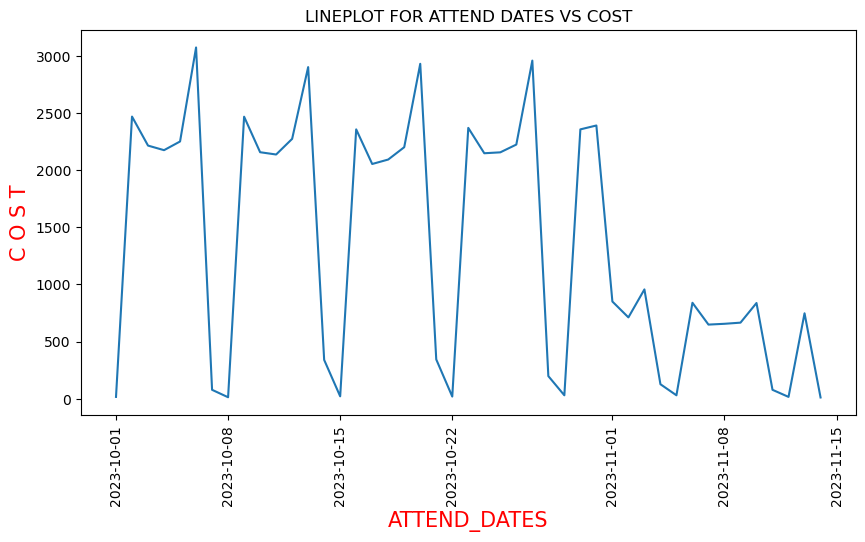

In [96]:
plt.figure(figsize=(10,5))
sns.lineplot(x='attend_date',y='cost',data=ts4)

plt.xticks(rotation="vertical")
plt.xlabel("ATTEND_DATES",size=15,c="r")
plt.ylabel("C O S T",size=15,c="r")
plt.title("LINEPLOT FOR ATTEND DATES VS COST")

plt.show()

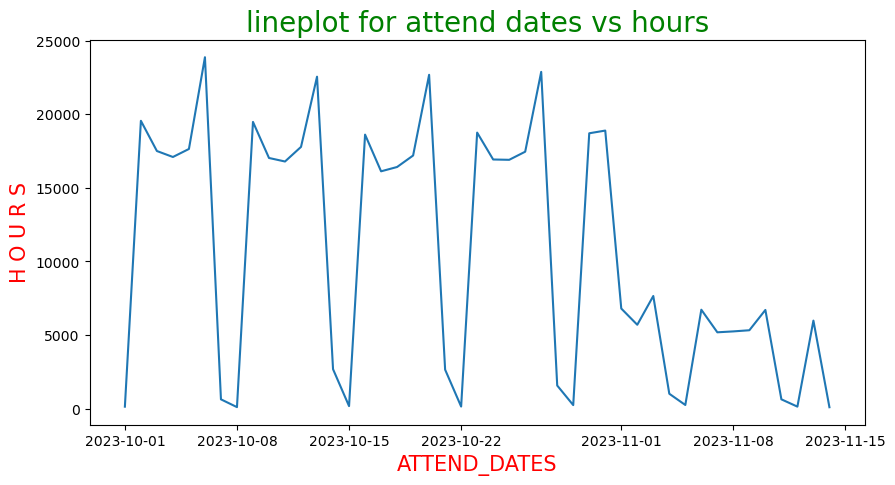

In [67]:
plt.figure(figsize=(10,5))

sns.lineplot(x="attend_date",y="hours",data=ts4)

plt.xlabel("ATTEND_DATES",size=15,c="r")
plt.ylabel("H O U R S",size=15,c="r")
plt.title("lineplot for attend dates vs hours",size=20,c="g")



plt.show()

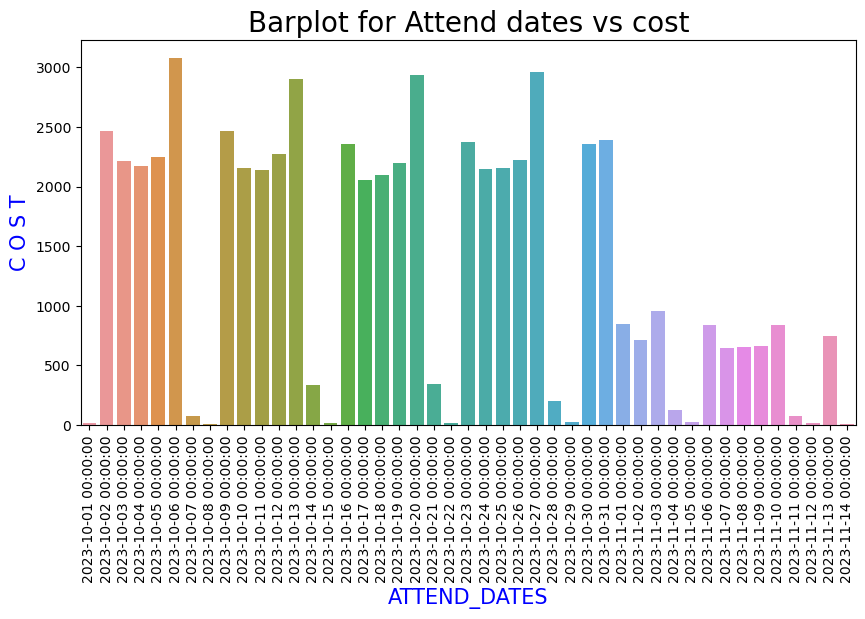

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x="attend_date",y="cost",data=ts4)


plt.xticks(rotation="vertical")
plt.xlabel("ATTEND_DATES",size=15,c="b")
plt.ylabel("C O S T",size=15,c="b")
plt.title("Barplot for Attend dates vs cost",size=20,c="k")

plt.show()


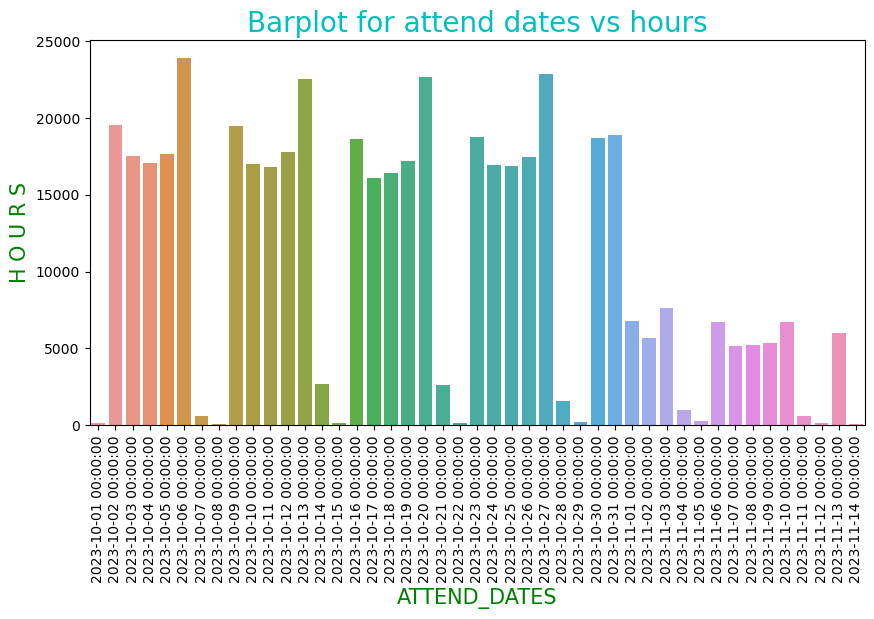

In [80]:
plt.figure(figsize=(10,5))

sns.barplot(x="attend_date",y="hours",data=ts4)
plt.xticks(rotation="vertical")
plt.xlabel("ATTEND_DATES",size=15,c="g")
plt.ylabel("H O U R S",size=15,c="g")
plt.title("Barplot for attend dates vs hours",size=20,c="c")

plt.show()

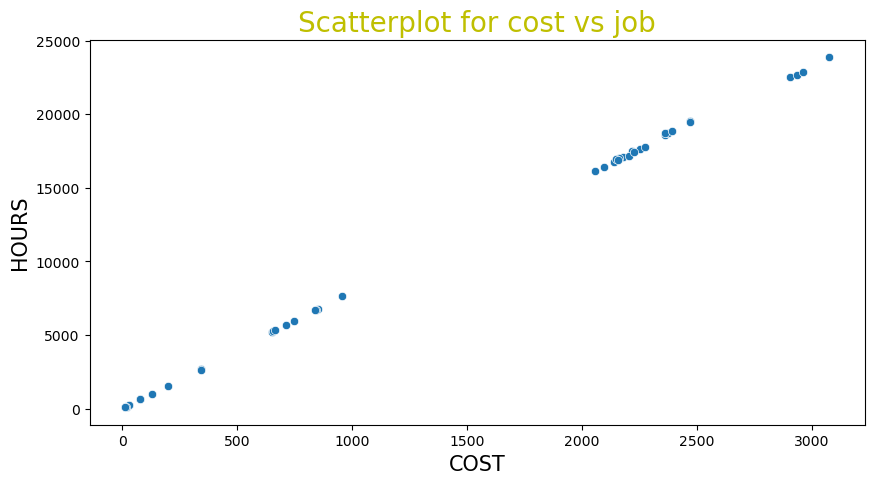

In [85]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="cost",y="hours",data=ts4)

plt.xlabel("COST",size=15)
plt.ylabel("HOURS",size=15)
plt.title("Scatterplot for cost vs job",size=20,c="y")


plt.show()


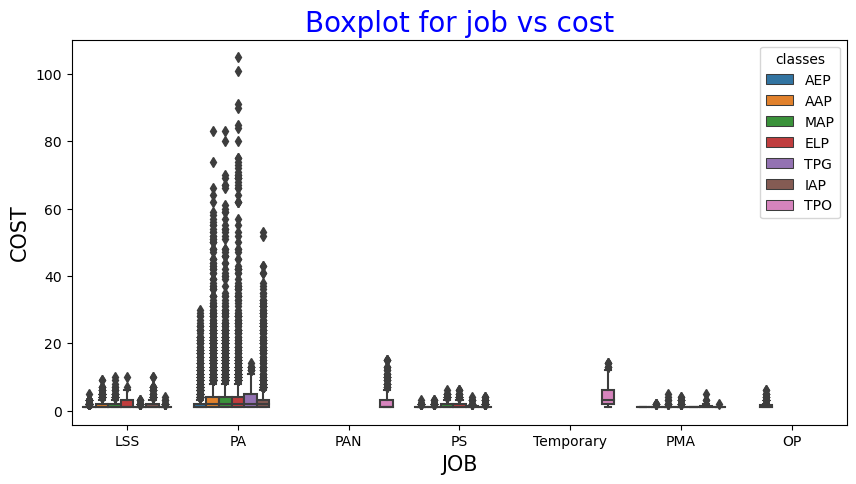

In [89]:
plt.figure(figsize=(10,5))

sns.boxplot(x="job",y="cost",data=ts2,hue="classes")

plt.xlabel("JOB",size=15)
plt.ylabel("COST",size=15)
plt.title("Boxplot for job vs cost",size=20,c="b")

plt.show()

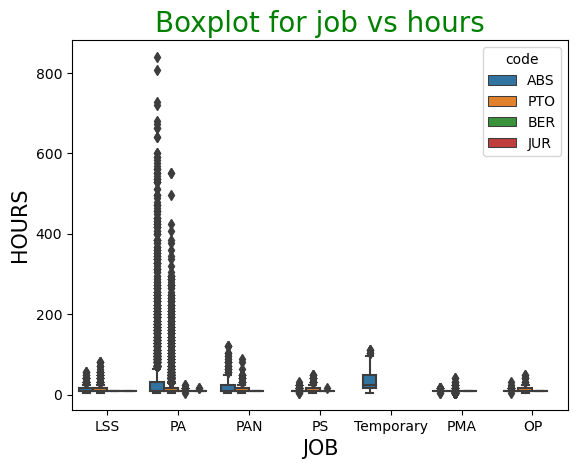

In [94]:

sns.boxplot(x="job",y="hours",hue="code",data=ts2)


plt.xlabel("JOB",size=15)
plt.ylabel("HOURS",size=15)
plt.title("Boxplot for job vs hours",size=20,c="g")


plt.show()